In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data = pd.read_csv("customer_reviews.csv")


In [22]:
print(data.head())
print(data.info())


                                     review_text  sentiment
0  This product is excellent and works perfectly          1
1           Very bad experience and poor quality          0
2               I am satisfied with the purchase          1
3                            Not worth the money          0
4                     Absolutely amazing service          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  6 non-null      object
 1   sentiment    6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None


In [23]:
data.dropna(inplace=True)


In [24]:
X_text = data['review_text']
y = data['sentiment']


In [25]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(X_text)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [27]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)


In [28]:
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
y_pred = dt_model.predict(X_test)


In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



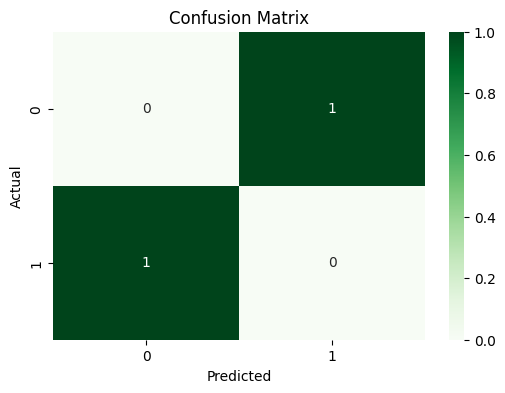

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


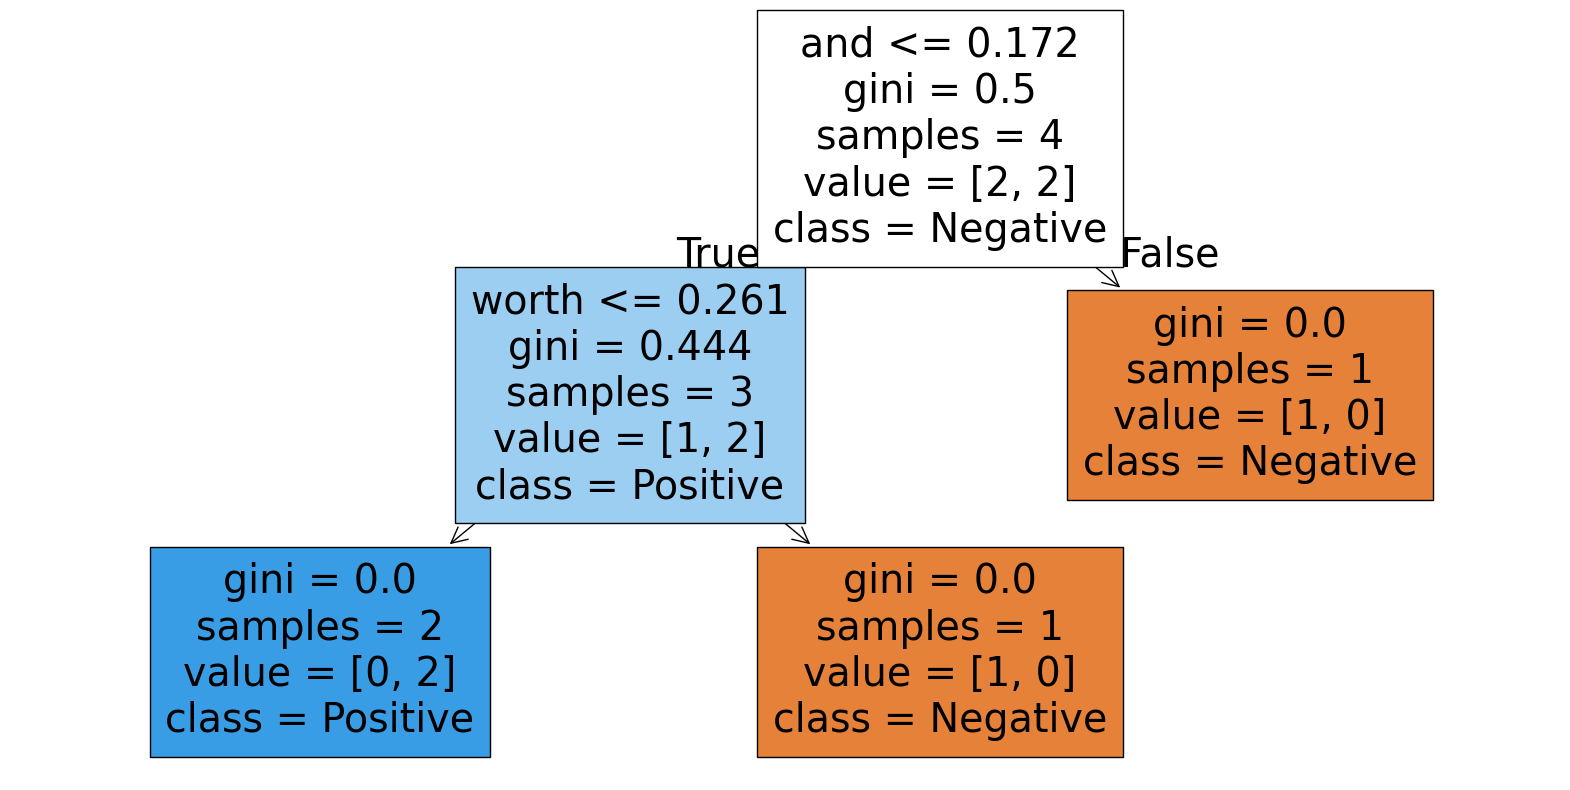

In [32]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=vectorizer.get_feature_names_out(),
    class_names=['Negative', 'Positive'],
    filled=True
)
plt.show()


In [33]:
importance = pd.DataFrame({
    'Feature': vectorizer.get_feature_names_out(),
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance.head(10))


       Feature  Importance
24       worth    0.666667
3          and    0.333333
0   absolutely    0.000000
2      amazing    0.000000
1           am    0.000000
5         ever    0.000000
6    excellent    0.000000
7   experience    0.000000
4          bad    0.000000
8           is    0.000000


In [34]:
"""1. Text data was converted into TF-IDF numerical features.
2. Decision Tree successfully trained without error.
3. Model provides interpretable sentiment classification.
4. Depth control avoids overfitting."""


'1. Text data was converted into TF-IDF numerical features.\n2. Decision Tree successfully trained without error.\n3. Model provides interpretable sentiment classification.\n4. Depth control avoids overfitting.'